## Breast_Cancer_Predictions


In this project, we will predict whether a patient has breast cancer or not.

Data set — The breast cancer data set can be found on the UCI ML repository and on Kaggle as well.

Algorithm and Implementation:

In this project, we will predict breast cancer based on fluid samples, taken from patients with solid breast masses. Based on certain features of the cell nucleus like “mean_radius”, “mean_texture”, “mean_perimeter”, “mean_area”, etc. we can predict whether the breast cancer is malignant or benign.

­The data includes few categorical features, they need to be converted to numerical features so that any machine learning model can process them. We can use the “get_dummies” or “one_hot_encoder” function of sklearn library for it.

After some data processing, apply a machine learning algorithm. Apply a Logistic Regression Model. 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

From sklearn.metrics, you can import classification_report, accuracy_score, precision_score, recall_score to check the performance metrics.

[Photo by Angiola Harry on Unsplash](https://miro.medium.com/proxy/0*u66Vb_z-Ij55HFc4)

In [111]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [112]:
# Load the data
data=pd.read_csv('./Data/Breast_cancer_data.csv')
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [113]:
# shape of data
data.shape

(569, 6)

In [114]:
# check info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [115]:
# check stats on data
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [116]:
# checking for null (n/a) values
data.isnull().values.any()

False

In [117]:
# check for null values sum
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [118]:
# separate the label from the data
X=data.drop(columns='diagnosis',axis=1)
y=data['diagnosis']

In [119]:
# check x and y
print(X)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]


In [120]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


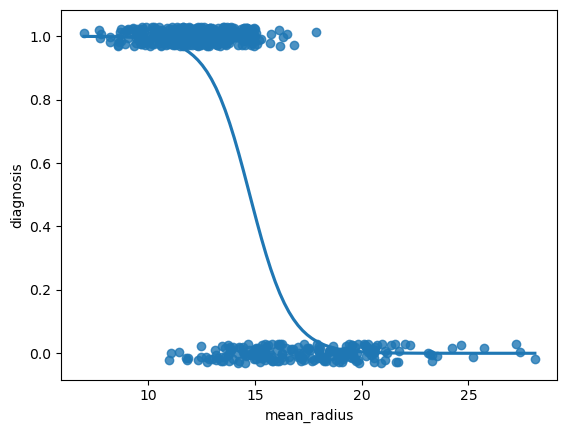

In [121]:
# plotting logistic regression model fit
sns.regplot(x= 'mean_radius', y= 'diagnosis',
           y_jitter = 0.03,
           data=data,
           logistic = True,
           ci= None)
#Display the plot
plt.show()

In [122]:
# Create variable
feature_names = X.columns
feature_names

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')

In [123]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [124]:
# Create a StandardScaler instance to scale the data
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [125]:
# Initiate a Logistic Regression Model
classifier = LogisticRegression(max_iter=1000)
classifier

LogisticRegression(max_iter=1000)

In [126]:
# Fit our model with our data(training)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [127]:
# Validate the model with our data (test data)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9272300469483568
Testing Data Score: 0.9440559440559441


## Feature Importance in Logistic Regression for Machine Learning Interpretability

In [128]:
#https://sefiks.com/2021/01/06/feature-importance-in-logistic-regression/
w0 = classifier.intercept_[0]
w = w1, w2, w3, w4, w5 = classifier.coef_[0]

equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4)+ (%f * x5)" % (w0, w1, w2, w3, w4, w5)
print(equation)

y = 0.711577 + (-1.261548 * x1) + (-1.383783 * x2) + (-1.889952 * x3) + (-1.482432 * x4)+ (-1.578506 * x5)


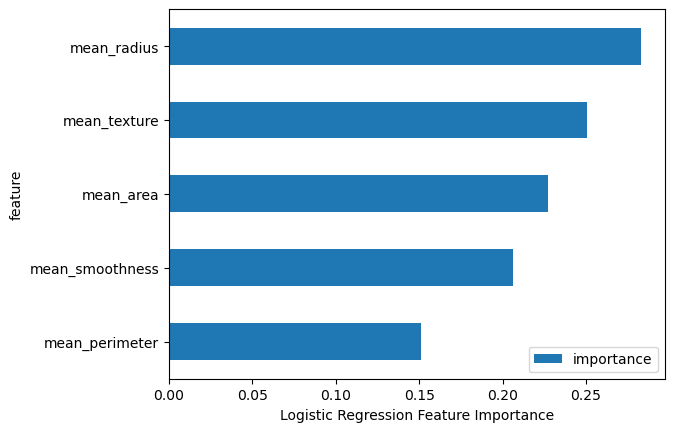

In [129]:
# Logic Simoid activation function
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.xlabel("Logistic Regression Feature Importance")
plt.show()

## Creating our test_df

In [130]:
# create test_df
test_df = X
#test_df.drop(['mean_perimeter], axis=1, inplace=True)
test_df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


## Test

In [104]:
df_X_test_scaled = scaler.fit_transform(test_df)

In [105]:
df_test_df=classifier.predict(df_X_test_scaled)
df_test_df

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [106]:
classifier.predict_proba(df_X_test_scaled)

array([[9.84304972e-01, 1.56950279e-02],
       [9.97035319e-01, 2.96468150e-03],
       [9.99828650e-01, 1.71350053e-04],
       ...,
       [9.78255501e-01, 2.17444986e-02],
       [9.99998720e-01, 1.28034628e-06],
       [8.79055451e-06, 9.99991209e-01]])

## Creating diagnosis_df

In [132]:
## Creating diagnosis_df based on predictions
diagnosis_df = pd.DataFrame(df_test_df, columns = ['diagnosis'])
diagnosis_df.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


## Summary

* The accuracy for the logistic model was **94.41**%

* Plotted logistic regression model fit

* Plotted Feature Importance in Logistic Regression

* For our test we created "test_df" data frame (for predicttion)

* Saved predictions as diagnosis in "diagnosis_df"

* The models was able to accurate predict the samples that most probale would have cancer
